# Guided Project: Investigating Fandango Movie Ratings

In October 2015, Walt Hickey from FiveThirtyEight published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data


In [1]:
import pandas as pd
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [4]:
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Before doing analysis we must be sure that our samples are representative. So if we look to the conditions of selection movies from Hickey's article and from the README.md of [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango) we see that:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

So samples from 'fandango_score_comparison.csv' data set can not be random.

The same situation with 'movie_ratings_16_17.csv' data set. The condition of selectoin movies:

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

So samples from 'movie_ratings_16_17.csv' data set can not be random too.



## Changing the Goal of our Analysis ##

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it. 

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolating the Samples We Need ##

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [7]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Let's check fandango_previous data set for be sure that it has votes more than 30.

In [8]:
sum(fandango_previous['Fandango_votes'] < 30)

0

If we explore the data sets enough, we'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

In [9]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [10]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Let's check the frequency distribution for the Year column and then isolate the movies released in 2015

In [11]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now let's isolate the movies released in 2016 from another data set

In [13]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [14]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
fandango2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango2016['year'].value_counts()

2016    191
Name: year, dtype: int64

So now we have two data sets fandango2015 and fandango2016 for our next analysis.

## Comparing Distribution Shapes for 2015 and 2016 ##

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

<function matplotlib.pyplot.show>

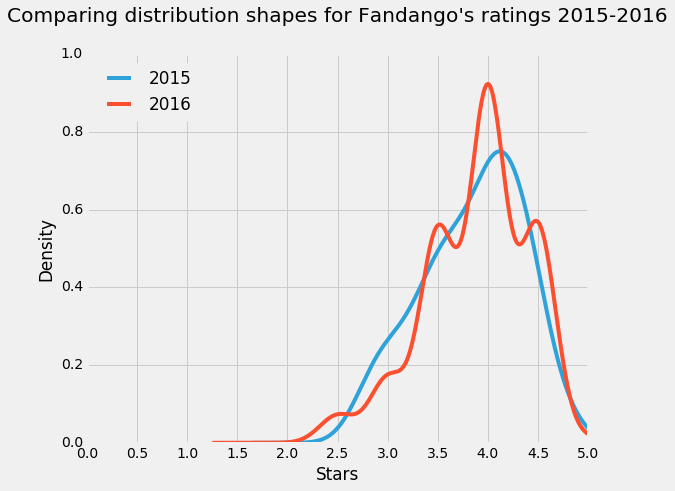

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')


fandango2015['Fandango_Ratingvalue'].plot.kde(label = '2015', legend = True, figsize=(8,6.5))
fandango2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings 2015-2016", y = 1.07) #'y' parameter makes plot more readable from legend
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show

As we see the shape of 2015 year on our kernel density plot seems to be similar to gaussian distribution and the shape of 2016 is not the same, it changed and we see that number of 4.0 rating increased. So it seems that popular movies in 2016 rated lower compared to 2015.

##  Comparing Relative Frequencies ##

We now need to analyze more granular information. Let's examine the frequency distribution tables of the two distributions.Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [33]:
print('2015' + '\n' + '-' * 16)
grouped_freq_table2015 = fandango2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100
print(grouped_freq_table2015)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [34]:
print('2016' + '\n' + '-' * 16)
grouped_freq_table2016 = fandango2016['fandango'].value_counts(normalize = True).sort_index()*100
print(grouped_freq_table2016)

2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


Now it's clear ratings have diffrences.

In 2015:

- no any rating less than 3.0;
- the rating 5.0 is 6.98%.

In 2016:

- rating 2.5 appeared and amount 3.14%;
- rating 4.0 increased approximately on 12%;
- rating 5.0 decreased to 0.5% from 6.98%

Generally we can conclude that in 2016 the ratings became more believable.

## Determining the Direction of the Change ##

We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [74]:
mean2015 = fandango2015['Fandango_Stars'].mean()
median2015 = fandango2015['Fandango_Stars'].median()
mode2015 = fandango2015['Fandango_Stars'].mode()[0]

In [75]:
mean2016 = fandango2016['fandango'].mean()
median2016 = fandango2016['fandango'].median()
mode2016 = fandango2016['fandango'].mode()[0]

In [66]:
summary_metrics = pd.DataFrame()
summary_metrics['2015'] = [mean2015, median2015, mode2015]
summary_metrics['2016'] = [mean2016, median2016, mode2016]
summary_metrics.index = ['mean', 'median', 'mode']
summary_metrics


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


<function matplotlib.pyplot.show>

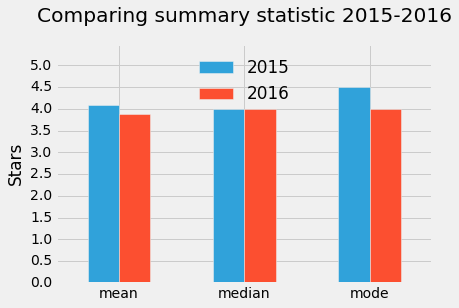

In [73]:
summary_metrics.plot.bar(rot=0)
plt.title("Comparing summary statistic 2015-2016", y = 1.07) #'y' parameter makes plot more readable from legend
plt.ylim(0.0,5.5) 
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015. The median in 2015 was the same as in 2016. And the mode chanded: in 2015 - 4.5, in 2016 - 4.0. This means a drop of almost 11% relative to the mode rating in 2015.

## Conclusion ##

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

So we can't be sure that new ratings in 2016 which were lower caused the Hickey's article but the new ratings seem to be more believable. 